<a href="https://colab.research.google.com/github/ssv273/Neural_Univesity/blob/main/hw_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Dropout # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image, ImageDraw  #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

In [3]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [4]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [5]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

# Model

In [6]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dropout(0.3)) # усложним модели жизнь
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель

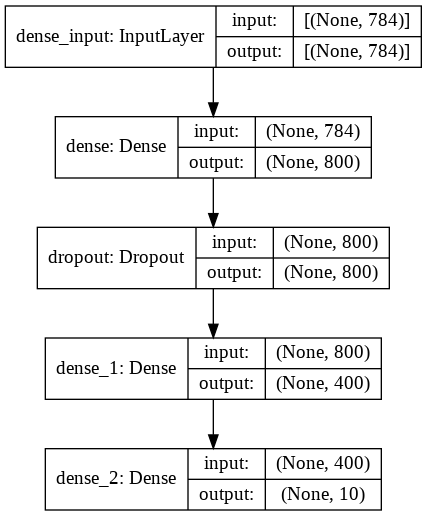

In [8]:
utils.plot_model(model, show_shapes=True)

In [9]:
model.fit(x_train, y_train, batch_size=512, epochs=15, verbose=1)

Epoch 1/15
118/118 [==============================] - 5s 37ms/step - loss: 0.3395 - accuracy: 0.9014
Epoch 2/15
118/118 [==============================] - 4s 36ms/step - loss: 0.1241 - accuracy: 0.9631
Epoch 3/15
118/118 [==============================] - 4s 37ms/step - loss: 0.0850 - accuracy: 0.9742
Epoch 4/15
118/118 [==============================] - 4s 37ms/step - loss: 0.0639 - accuracy: 0.9803
Epoch 5/15
118/118 [==============================] - 4s 37ms/step - loss: 0.0504 - accuracy: 0.9845
Epoch 6/15
118/118 [==============================] - 4s 37ms/step - loss: 0.0416 - accuracy: 0.9867
Epoch 7/15
118/118 [==============================] - 4s 37ms/step - loss: 0.0344 - accuracy: 0.9893
Epoch 8/15
118/118 [==============================] - 4s 36ms/step - loss: 0.0285 - accuracy: 0.9914
Epoch 9/15
118/118 [==============================] - 4s 36ms/step - loss: 0.0274 - accuracy: 0.9907
Epoch 10/15
118/118 [==============================] - 4s 36ms/step - loss: 0.0235 - accura

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0603 - accuracy: 0.9831


[0.060300562530756, 0.9830999970436096]

# Работа со своими изображениями

In [11]:
# загрузка изображений
img_two = image.load_img('2.jpg', target_size=(28,28), color_mode='grayscale')
img_five = image.load_img('5.jpg', target_size=(28,28), color_mode='grayscale')

In [12]:
# преобразование в массивы чисел
img_two_array = image.img_to_array(img_two)
img_five_array = image.img_to_array(img_five)

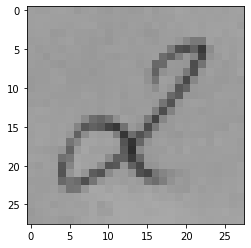

In [13]:
plt.imshow(Image.fromarray(img_two_array[:,:,0]).convert('RGBA')) # Нарисуем картинку

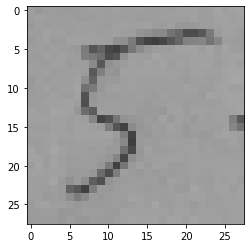

In [14]:
plt.imshow(Image.fromarray(img_five_array[:,:,0]).convert('RGBA')) # Нарисуем картинку

### Инвертируем цвета

In [15]:
img_two_array_inv = 255 - img_two_array
img_five_array_inv = 255 - img_five_array

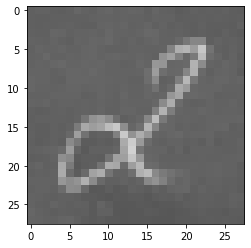

In [16]:
plt.imshow(Image.fromarray(img_two_array_inv[:,:,0]).convert('RGBA')); # Нарисуем картинку

In [17]:
# нормализация
img_two_array_inv = img_two_array_inv.astype('float32')
img_two_array_inv = img_two_array_inv / 255

img_five_array_inv = img_five_array_inv.astype('float32')
img_five_array_inv = img_five_array_inv / 255

In [18]:
# максимальные и минимальные значения на картинке
img_two_array_inv.max(), img_two_array_inv.min()

(0.81960785, 0.34117648)

In [19]:
# максимальные и минимальные значения на картинке
img_five_array_inv.max(), img_five_array_inv.min()

(0.75686276, 0.34901962)

### Бинаризация по порогу

In [20]:
# все значения, которые меньше порога установим в 0, остальные в 1
img_two_binary = (img_two_array_inv > 0.5).astype(np.uint8)
img_five_binary = (img_five_array_inv > 0.5).astype(np.uint8)

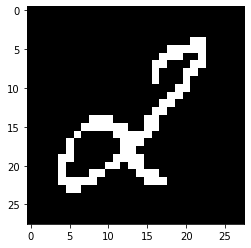

In [21]:
plt.imshow(img_two_binary[:, :, 0], cmap='gray');

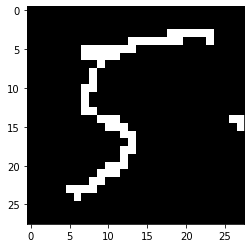

In [22]:
plt.imshow(img_five_binary[:, :, 0], cmap='gray');

In [23]:
img_two_binary.shape, img_five_binary.shape

((28, 28, 1), (28, 28, 1))

# Predict

In [24]:
# преобразуем массив в нужную нам форму
img_two_reshape = img_two_binary.reshape(1, -1)
img_five_reshape = img_five_binary.reshape(1, -1)

In [25]:
# получим предсказание модели
prediction_two = model.predict(img_two_reshape)
prediction_five = model.predict(img_five_reshape)

In [26]:
# найдём индекс макимального значения среди вектора предсказаний
pred_two = np.argmax(prediction_two)
pred_five = np.argmax(prediction_five)

In [27]:
# выведем результат
print(f'На картинке 2.jpg изображена цифра {pred_two} с вероятностью {prediction_two[0][pred_two]:.2%}')
print(f'На картинке 5.jpg изображена цифра {pred_five} с вероятностью {prediction_five[0][pred_five]:.2%}')

На картинке 2.jpg изображена цифра 2 с вероятностью 59.14%
На картинке 5.jpg изображена цифра 5 с вероятностью 100.00%


### если не проводить бинаризацию по порогу, то получим такие предсказания модели

In [28]:
print(f'На картинке 2.jpg изображена цифра {\
    np.argmax(model.predict(img_two_array_inv.reshape(1, -1)))\
    } с вероятностью {model.predict(img_two_array_inv.reshape(1, -1))[0][np.argmax(model.predict(img_two_array_inv.reshape(1, -1)))]:.2%}')
print(f'На картинке 5.jpg изображена цифра {\
    np.argmax(model.predict(img_five_array_inv.reshape(1, -1)))\
    } с вероятностью {model.predict(img_five_array_inv.reshape(1, -1))[0][np.argmax(model.predict(img_five_array_inv.reshape(1, -1)))]:.2%}')

На картинке 2.jpg изображена цифра 2 с вероятностью 60.91%
На картинке 5.jpg изображена цифра 5 с вероятностью 87.98%


### если не инвертировать цвета, то получаем такие предсказания

In [29]:
img_two_array = img_two_array.astype('float32') / 255
img_five_array = img_five_array.astype('float32') / 255

print(f'На картинке 2.jpg изображена цифра {\
    np.argmax(model.predict(img_two_array.reshape(1, -1)))\
    } с вероятностью {model.predict(img_two_array.reshape(1, -1))[0][np.argmax(model.predict(img_two_array.reshape(1, -1)))]:.2%}')
print(f'На картинке 5.jpg изображена цифра {\
    np.argmax(model.predict(img_five_array.reshape(1, -1)))\
    } с вероятностью {model.predict(img_five_array.reshape(1, -1))[0][np.argmax(model.predict(img_five_array.reshape(1, -1)))]:.2%}')

На картинке 2.jpg изображена цифра 5 с вероятностью 98.28%
На картинке 5.jpg изображена цифра 5 с вероятностью 55.57%
